In [1]:
# import the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('clean_data')
df = df[['category_name','plain_text','pretty_class']].dropna()

vectorizer = TfidfVectorizer(ngram_range=(2,2)) # You can still specify n-grams here.
X = vectorizer.fit_transform(df['plain_text'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
features = X
targets = np.array(df.category_name)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets.reshape(-1,1), test_size = 0.25)

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1, random_state=0,verbose=True)
rf.fit(x_train,np.ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=True,
                       warm_start=False)

In [6]:
rf.score(x_train,np.ravel(y_train))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


0.9957334850316433

In [7]:
rf.score(x_test,np.ravel(y_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.840443686006826

In [31]:
# prepare data for tensorflow multi labels
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(y_train)

# 3. Transform
onehotlabels_train = enc.transform(y_train)
onehotlabels_test = enc.transform(y_test)
print(onehotlabels_train.shape)
print(onehotlabels_test.shape)

from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(4, input_shape = (x_train.shape[1],), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(onehotlabels_train.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0008), metrics=['accuracy'])
history = model.fit(x_train, onehotlabels_train, epochs=50, batch_size=100, \
         validation_data=(x_test, onehotlabels_test))

model.evaluate(x_train, onehotlabels_train)
model.evaluate(x_test, onehotlabels_test)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

(14063, 9)
(4688, 9)
Train on 14063 samples, validate on 4688 samples
Epoch 1/50
14063/14063 [==============================] - 8s 558us/step - loss: 1.9448 - acc: 0.4622 - val_loss: 1.5877 - val_acc: 0.4731
Epoch 2/50
14063/14063 [==============================] - 7s 522us/step - loss: 1.3867 - acc: 0.4696 - val_loss: 1.2842 - val_acc: 0.4731
Epoch 3/50
14063/14063 [==============================] - 7s 518us/step - loss: 1.1720 - acc: 0.4830 - val_loss: 1.1494 - val_acc: 0.4964
Epoch 4/50
14063/14063 [==============================] - 7s 517us/step - loss: 1.0400 - acc: 0.5038 - val_loss: 1.0675 - val_acc: 0.5028
Epoch 5/50
14063/14063 [==============================] - 8s 588us/step - loss: 0.9315 - acc: 0.5085 - val_loss: 0.9909 - val_acc: 0.5066
Epoch 6/50
14063/14063 [==============================] - 8s 589us/step - loss: 0.8024 - acc: 0.5547 - val_loss: 0.8985 - val_acc: 0.6246
Epoch 7/50
14063/14063 [==============================] - 8s 584us/step - loss: 0.6406 - acc: 0.7328 -

[0.015990939652399557, 0.9946668562937926]

4688/4688 [==============================] - 2s 478us/step


[1.1494187650369296, 0.8197525597269625]

In [33]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
#model.save('nlp_dnn.h5')

# Deletes the existing model
#del model  

# Returns a compiled model identical to the previous one
#model = load_model('nlp_dnn.h5')

In [34]:
pred = model.predict_classes(x_test)
matrix = metrics.confusion_matrix(onehotlabels_test.argmax(axis=1), pred)
print(matrix)

[[  49    6    0   18   10    1    0    3    4]
 [   3  138    0   15   24    4    6    3    4]
 [   0    0   12    0    0    0    0    8    1]
 [   6    3    0 1988   23    1  162   11   24]
 [   2    5    0   12  112    0    3    3    3]
 [   6    9    0    6    5  106    0    4    0]
 [   3    3    0  158   11    0 1023    1   71]
 [   4    0    2   14   11    0   10  117   30]
 [   1    1    0   30    5    2   83    7  298]]


Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

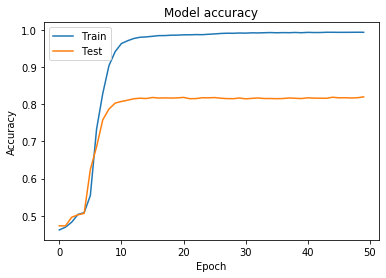

In [35]:
# plotting training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

In [30]:
# from keras import Sequential
# from keras.layers import LSTM

# model = Sequential()
# model.add(LSTM(units=6, input_shape = x_train.shape[1:], return_sequences = True))
# model.add(LSTM(units=6, return_sequences=True))
# model.add(LSTM(units=6, return_sequences=True))
# model.add(LSTM(units=1, return_sequences=True, name='output'))
# model.compile(loss='cosine_proximity', optimizer='sgd', metrics = ['accuracy'])

# print(model.summary())

# model.fit(x_train, y_train, epochs=1, verbose=1)